In [32]:
# import
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

In [33]:
# set SMILES for first_mol (benzene)
first_smiles = "c1ccccc1"

# Convert to RDKit molecule
first_mol = Chem.MolFromSmiles(first_smiles)

# Add hydrogens
first_mol = Chem.AddHs(first_mol)

# 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(first_mol)

# Optimize molecule
AllChem.MMFFOptimizeMolecule(first_mol)

# Orient the molecule
Chem.rdMolTransforms.CanonicalizeConformer(first_mol.GetConformer())

In [34]:
# set SMILES for second_mol (benzene)
second_smiles = "c1ccccc1"

# Convert to RDKit molecule
second_mol = Chem.MolFromSmiles(second_smiles)

# Add hydrogens
second_mol = Chem.AddHs(second_mol)

# 3D by generating a random conformer
Chem.AllChem.EmbedMolecule(second_mol)

# Optimize molecule
AllChem.MMFFOptimizeMolecule(second_mol)

# Get centeroid of first oriented molecule
center = Chem.rdMolTransforms.ComputeCentroid(first_mol.GetConformer())

# Orient the molecule
Chem.rdMolTransforms.CanonicalizeConformer(second_mol.GetConformer(), center=center)

In [35]:
import numpy as np
from rdkit.Chem import rdMolTransforms


def translate(x,y,z):
    return  np.array([[1, 0, 0, x],
                      [0, 1, 0, y],
                      [0, 0, 1, z],
                     [0, 0, 0, 1]], dtype=np.double)


def rotation_x(angle_degree):
    angle_radian = angle_degree * np.pi / 180
    return  np.array([[1, 0, 0, 0],
                      [0, np.cos(angle_radian), -np.sin(angle_radian), 0],
                      [0, np.sin(angle_radian), np.cos(angle_radian), 0],
                     [0, 0, 0, 1]], dtype=np.double)

def rotation_y(angle_degree):
    angle_radian = angle_degree * np.pi / 180
    return  np.array([[np.cos(angle_radian), 0, np.sin(angle_radian), 0],
                      [0, 1, 0, 0],
                      [-np.sin(angle_radian), 0, np.cos(angle_radian), 0],
                     [0, 0, 0, 1]], dtype=np.double)

def rotation_z(angle_degree):
    angle_radian = angle_degree * np.pi / 180
    return  np.array([[np.cos(angle_radian), -np.sin(angle_radian), 0, 0],
                      [np.sin(angle_radian), np.cos(angle_radian), 0, 0],
                      [0, 0, 1, 0],
                     [0, 0, 0, 1]], dtype=np.double)


In [38]:
# apply transformation
rdMolTransforms.TransformConformer(second_mol.GetConformer(0), rotation_x(90))
rdMolTransforms.TransformConformer(second_mol.GetConformer(0), translate(8,0,0))

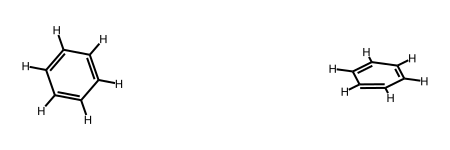

In [39]:
# combine the two molecules
dimer = Chem.CombineMols(first_mol,second_mol)
dimer

In [13]:
# Save the molecule in XYZ format 
Chem.MolToXYZFile(dimer,"dimer.xyz")